# Тема 1. Интерполяция в полиномиальных базисах

In [103]:
%matplotlib inline

import numpy as np

import scipy.linalg as la
import scipy.interpolate as interp
import scipy.integrate as integrate

import matplotlib as mpl
import matplotlib.pyplot as plt

import sympy

default_dpi = mpl.rcParamsDefault['figure.dpi']
factor = 1
mpl.rcParams['figure.dpi'] = default_dpi * factor

In [104]:
import numpy as np
import scipy.linalg as la
import scipy.interpolate as interp
import scipy.integrate as integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
import sympy

In [105]:
# --- helpers ---

def draw_p(x, y) -> None:
    plt.plot(x, y, 'o', markersize=5, color = 'crimson')
    
def draw_l(x, y) -> None:
    plt.plot(x, y)

## Часть 1. Интерполяция полиномами

Пусть функция $f(x)$ задана набором точек $(x_i,y_i)$ на интервале $[a,b]$:

$y_i=f(x_i)$, $i=0..n$, a $\leq x_i \leq b$,  

**Задача интерполяции** – найти функцию $F(x)$, принимающую в точках $x_i$ те же значения $y_i$. Тогда, **условие интерполяции**:

$F(x_i) = y_i$

При этом предполагается, что среди значений $x_i$ нет одинаковых. Точки $x_i$ называют **узлами интерполяции**.

Если $F(x)$ ищется только на отрезке $[a,b]$ – то это **задача интерполяции**, а если за пределами первоначального отрезка, то это **задача экстраполяции**.

Задача нахождения интерполяционной функции $F(x)$ имеет много решений, так как через заданные точки $x_i, y_i$ можно провести бесконечно много кривых, каждая из которых будет графиком функции, для которой выполнены все условия интерполяции. Для практики важен случай интерполяции функции многочленами:

$F(x) = P_m(x_i) = a_0 + a_1*x + a_2*x^2 + ... + a_m*x^m, i = 0..m$

При этом искомый полином называется **интерполяционным полиномом**.

При построении одного многочлена для всего рассматриваемого интервала $[a,b]$ для нахождения коэффициентов многочлена необходимо решить систему уравнений, построенную на основе полинома $F(x)$. Данная система содержит $n+1$ уравнение, следовательно, с ее помощью можно определить $n+1$ коэффициент. Поэтому максимальная степень интерполяционного многочлена $m=n$, и многочлен принимает вид:
$P_n(x_i) = a_0 + a_1*x + a_2*x^2 + ... + a_n*x^n, i = 0..n$


### Пример 1

In [106]:
# Количество точек
n_points = 20

# Рассматриваем график на отрезке [0, 3*Pi]
x_start = 0.0
x_end = 3.0 * np.pi

# Генерация точек на отрезке
x = np.linspace(x_start, x_end, num=n_points, endpoint=True)

# Формула
y = np.sin(x_a)

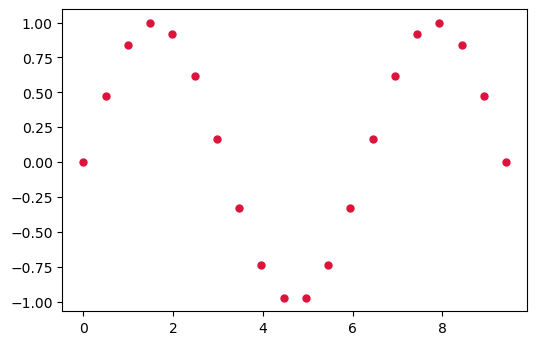

In [107]:
draw_p(x_a, y_a)

Полином Лагранжа:
---------------
           19             18             17             16
5.622e-23 x  + 1.259e-16 x  - 1.068e-14 x  + 3.808e-13 x 
              15             14             13             12
 - 7.217e-12 x  + 7.661e-11 x  - 5.181e-10 x  + 4.628e-09 x 
              11             10             9             8
 - 4.975e-08 x  + 1.039e-07 x  + 2.411e-06 x + 8.993e-07 x
              7             6           5             4          3
 - 0.0002002 x + 2.818e-06 x + 0.00833 x + 2.657e-06 x - 0.1667 x
              2
 + 4.665e-07 x + 1 x
---------------


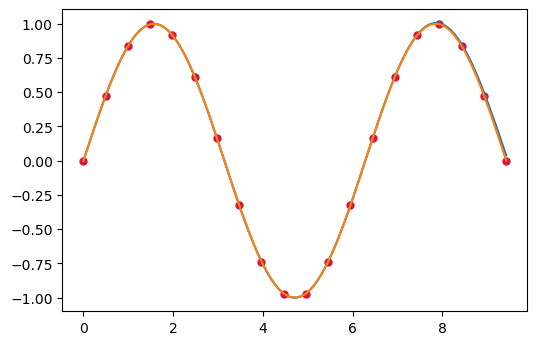

In [108]:
poly = interp.lagrange(x_a, y_a)

x = np.linspace(x_start, x_end, num=100, endpoint=True )
y = np.sin(x)

# Печатаем полином Лагранжа
print('Полином Лагранжа:')
print('---------------')
print(poly_a)
print('---------------')

draw_p(x_a, y_a)
draw_l(x_d, poly_a(x_d))
draw_l(x_d, y_d)

### Пример 2

In [ ]:
n_points = 5
x_start = -1.0
x_end = 1.0

<Figure size 600x400 with 0 Axes>

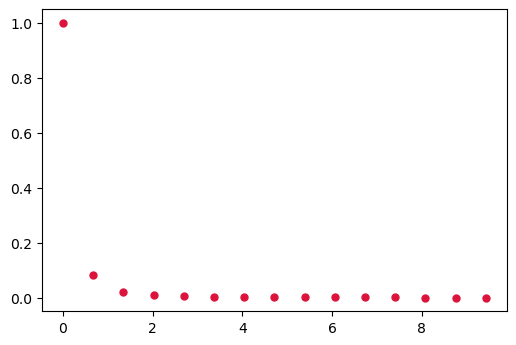

<Figure size 600x400 with 0 Axes>

In [116]:
x = np.linspace(x_start, x_end, num=n_points, endpoint=True)
y = 1/(1+25 * x**2)

draw_p(x, y)
plt.figure()

Полином Лагранжа:
---------------
           14             13             12             11
1.457e-09 x  - 1.077e-07 x  + 3.608e-06 x  - 7.248e-05 x 
              10            9          8          7         6         5
 + 0.0009738 x  - 0.009234 x + 0.0636 x - 0.3223 x + 1.205 x - 3.296 x
          4         3         2
 + 6.482 x - 8.872 x + 8.004 x - 4.309 x + 1.09
---------------


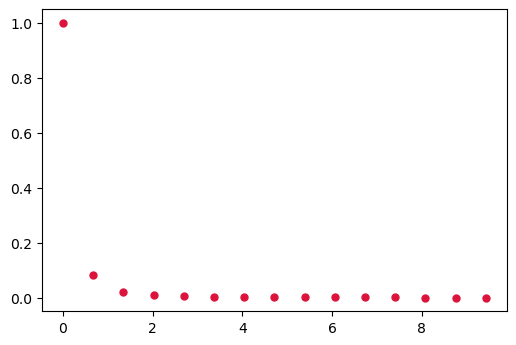

<Figure size 600x400 with 0 Axes>

In [115]:
poly = interp.lagrange(x_f, y_f)
print('Полином Лагранжа:')
print('---------------')
print(poly)
print('---------------')

x_plot = np.linspace(x_start, x_end, num=100, endpoint=True )

y_plot = 1/(1+25*x_plot*x_plot)

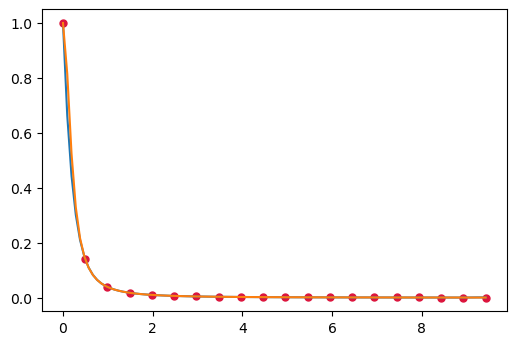

In [111]:
draw_p(x_f, y_f)
draw_l(x_plot, poly_f(x_plot))
draw_l(x_plot, y_plot)

### Расположение узлов интерполяции в корнях полинома Чебышева

Полином Лагранжа:
---------------
           14             13             12             11
1.457e-09 x  - 1.077e-07 x  + 3.608e-06 x  - 7.248e-05 x 
              10            9          8          7         6         5
 + 0.0009738 x  - 0.009234 x + 0.0636 x - 0.3223 x + 1.205 x - 3.296 x
          4         3         2
 + 6.482 x - 8.872 x + 8.004 x - 4.309 x + 1.09
---------------


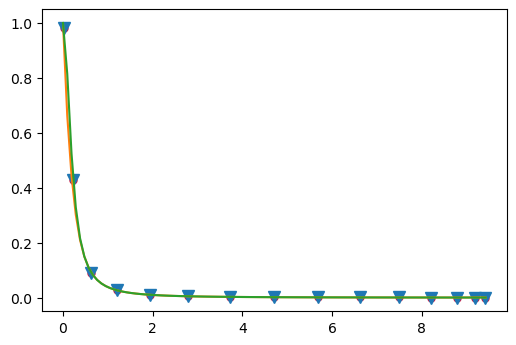

In [113]:
n_points = 15
x_f = np.zeros((n_points))

for k in range(0, n_points):
        x_f[k] = np.cos((np.pi/2+np.pi*k)/n_points)
        x_f[k] = (x_start+x_end)/2 + (x_end-x_start)/2*x_f[k]
        
y_f = 1/(1+25*x_f*x_f)

draw_p(x_f, y_f)
#plt.figure()

poly = interp.lagrange(x_f, y_f)
print('Полином Лагранжа:')
print('---------------')
print(poly)
print('---------------')

y_plot = 1/(1+25*x_plot*x_plot)
plt.plot(x_f, y_f, 'v', markersize=8)
plt.plot(x_plot, poly_f(x_plot))
plt.plot(x_plot, y_plot)

## Часть 2. Сплайн - интерполяция

### Пример 3

[-1.  -0.5  0.   0.5  1. ]
[0.  0.5 0.9 1.  0.8]


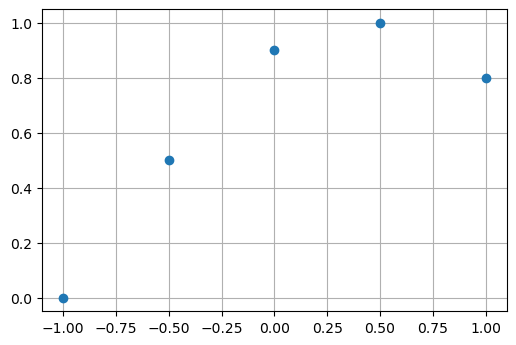

In [7]:
x = np.array([-1, -0.5, 0, 0.5, 1])
y = np.array([0, 0.5, 0.9, 1, 0.8])
print (x)
print (y)

plt.grid()
plt.plot(x, y, 'o')

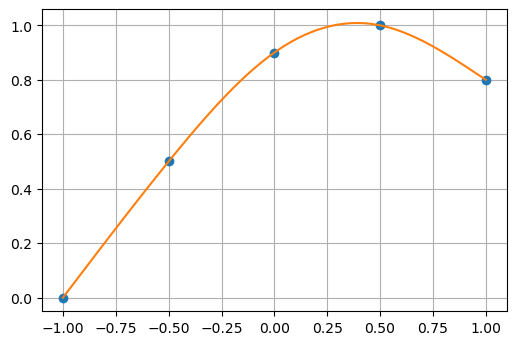

In [8]:
cubic = interp.CubicSpline(x, y, bc_type='natural')

x_d = np.arange (-1, 1.01, 0.01)
plt.grid()
plt.plot(x, y, 'o')
plt.plot(x_d, cubic(x_d))

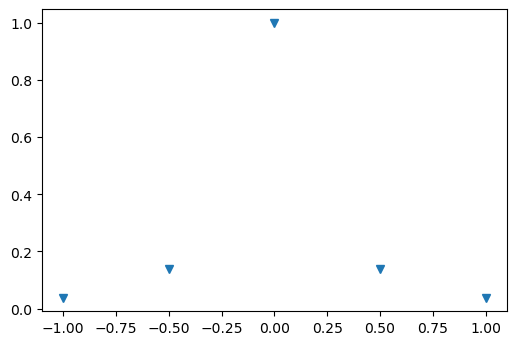

In [9]:
n_points = 5
x_start = -1.0
x_end = 1.0

x_c = np.linspace (x_start, x_end, num=n_points, endpoint=True )
y_c = 1/(1+25*x_c*x_c)
#y_c = np.exp(-x_c**2)

plt.plot(x_c, y_c, 'v')

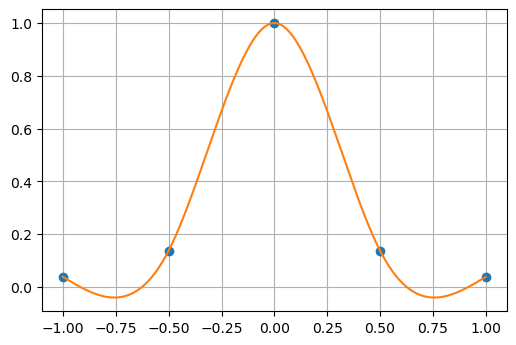

In [10]:
cubic = interp.CubicSpline(x_c, y_c, bc_type='natural')
x_plot = x_d
plt.grid()
plt.plot(x_c, y_c, 'o')

plt.plot(x_plot, cubic(x_plot))

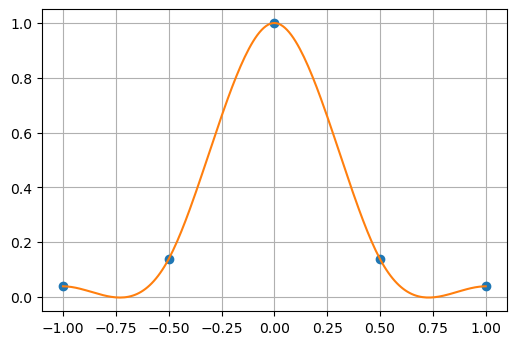

In [11]:
cubic = interp.CubicSpline(x_c, y_c, bc_type='clamped')
plt.grid()
x_plot = x_d
plt.plot(x_c, y_c, 'o')
plt.plot(x_plot, cubic(x_plot))